In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import scipy.integrate as integrate
import pandas as pd

In [3]:
#ls

In [4]:
pwd

'/Users/teresita/Documents/cosmic reionization paper/DeltaGamma'

In [5]:
#phi(chi+zeta)
columns = ["z", "fi_chi_zeta", "chi", "epsilon_gal", "epsilon_qso", "LG2", "LQ2", "Ds"]
Gamma_coef = pd.read_csv("LyAMakeTabledGammakCoeffs_W14B21_aj_1.8_aS_0.8_zi_8.0_zf_4.8_lzMG_321.0_bf_0.0_bet_1.2_cf_1.0_iQ_3.0_Ds.out", delim_whitespace= True,engine='python', names = columns)

In [8]:
Gamma_coef.shape

(321, 8)

In [5]:
#"cdenPowsp_omm_0_3_omv_0_7_ombh2_0_0_h_0_7_an_1_0_s8_0_8_ips_3.out"
columns = ["wl", "PDM"]
deltas_CDM = pd.read_csv("cdenPowsp_omm_0_3_omv_0_7_ombh2_0_0_h_0_7_an_1_0_s8_0_8_ips_3.out", delim_whitespace= True, names = columns)
deltas_CDM

,wl,PDM
0,0.000100,407.3070
1,0.000101,411.1998
2,0.000102,415.1296
3,0.000103,420.1145
4,0.000104,424.1389
...,...,...
696,0.096130,5875.1080
697,0.097083,5773.9000
698,0.098046,5676.7200
699,0.099018,5583.7070


In [6]:
Gamma_coef



,z,fi_chi_zeta,chi,epsilon_gal,epsilon_qso,LG2,LQ2,Ds
0,4.80,36.14801,28.87393,3.125228e+24,3.179806e+23,1.526481e+51,1.901255e+54,0.221231
1,4.81,36.46265,29.07019,3.129282e+24,3.129639e+23,1.534870e+51,1.882608e+54,0.220853
2,4.82,36.78824,29.26744,3.133316e+24,3.080424e+23,1.543275e+51,1.864377e+54,0.220475
3,4.83,37.12570,29.46568,3.137330e+24,3.032143e+23,1.551697e+51,1.846554e+54,0.220100
4,4.84,37.47602,29.66491,3.141325e+24,2.984779e+23,1.560136e+51,1.829133e+54,0.219725
...,...,...,...,...,...,...,...,...
316,7.96,889.55680,24993.16000,2.427882e+24,6.258812e+24,4.007647e+51,6.811871e+55,0.143421
317,7.97,890.54960,25457.55000,2.421446e+24,6.627919e+24,4.012210e+51,7.187640e+55,0.143261
318,7.98,891.54240,25930.03000,2.415016e+24,7.022043e+24,4.016744e+51,7.587639e+55,0.143102
319,7.99,892.53000,26410.68000,2.408593e+24,7.443060e+24,4.021249e+51,8.013609e+55,0.142943


In [7]:
np.sqrt(Gamma_coef.LQ2)

0      1.378860e+27
1      1.372082e+27
2      1.365422e+27
3      1.358880e+27
4      1.352454e+27
           ...     
316    8.253406e+27
317    8.477995e+27
318    8.710705e+27
319    8.951876e+27
320    9.201863e+27
Name: LQ2, Length: 321, dtype: float64

# n$_\mathrm{eff}$

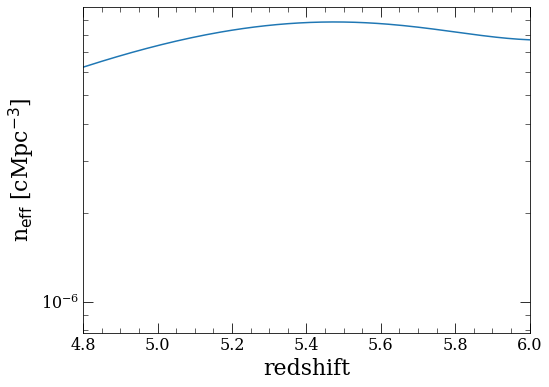

In [8]:
neff = (Gamma_coef.epsilon_gal + Gamma_coef.epsilon_qso)**2./(Gamma_coef.LG2.values + Gamma_coef.LQ2.values)

plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})
plt.plot(Gamma_coef.z, neff)
plt.yscale('log')
plt.xlim(4.8,6.0)
#plt.ylim(1.e-6,10**-5)
plt.ylabel("n$_\mathrm{eff}$ [cMpc$^{-3}$]", fontsize = 22)
plt.xlabel("redshift", fontsize = 22)
plt.savefig("neffective.pdf")

Some definitions

In [9]:
c = 299792.458 #km/s
H0 = 70 #km/s/Mpc
fk = 10**np.linspace(-4,3,701) #comoving Mpc? Mpc^-1 h

# k es el wavenumber (?)  k goes 10**np.linspace(-4,-1,31)
def kappa(k):
    #kapp = c*k*h/H0 ###ADD the factor h!!
    kapp = c*k/H0
    return kapp
# a depends on redshift, n is the index in the array.
# a is the scale factor 1/1+z
def a(n): 
    a_cte= 1./(1+Gamma_coef.z.values[n])
    return a_cte
    
#b_chi_delta = 1.5 #play with it a little bit



### Biases and constants

In [10]:

#b_chi_gamma= -0.2
#b_chi_delta= 0.98

b_chi_delta = 1.0#0.574
b_chi_gamma = -0.2
bg=3.0 #2.5 
#bq=1.0
#bj = 1.5
beta=0.2+1 
ba= -0.2
tau_eff=6.0

In [11]:
kappa(2)

8565.4988

$\langle \tilde\delta_\Gamma^* \tilde\delta_\Gamma \rangle = \left[\frac{\kappa}{a} \left[\mathrm{atan}(\frac{\kappa}{a\phi(\chi+\zeta)}) \right]^{-1} + b_{\chi,\Gamma}\; \chi \right]^{-2}$ $\left[ \phi^2(\chi+\zeta)^2 \langle \tilde\delta_j \tilde\delta_j \rangle -2\phi(\chi+\zeta)b_{\chi,\delta}\chi \langle \tilde\delta\tilde\delta_j\rangle + b^2_{\chi,\delta} \chi^2 \langle \tilde\delta\tilde\delta \rangle\right]$

delta_gamma_denominator_factor = $\left[\frac{\kappa}{a} \left[\mathrm{atan}(\frac{\kappa}{a\phi(\chi+\zeta)}) \right]^{-1} + b_{\chi,\Gamma}\; \chi \right]^{2}$

term01 = $ \phi^2(\chi+\zeta)^2 \langle \tilde\delta_j \tilde\delta_j \rangle$

term02 = $-2\phi(\chi+\zeta)b_{\chi,\delta}\chi \langle \tilde\delta\tilde\delta_j\rangle$

term03 = $b^2_{\chi,\delta} \chi^2 \langle \tilde\delta\tilde\delta \rangle$

In [12]:
atan_argument = kappa(fk)/(a(0)*Gamma_coef.fi_chi_zeta.values[0:1])
k_a = kappa(fk)/a(0)

delta_gamma_denominator_factor = (k_a*(1.0/np.arctan(atan_argument)) + (b_chi_delta*Gamma_coef.chi.values[0:1]))**2.

### denominator

In [13]:
1./delta_gamma_denominator_factor

array([2.36113803e-04, 2.36094397e-04, 2.36074080e-04, 2.36052812e-04,
       2.36030548e-04, 2.36007241e-04, 2.35982843e-04, 2.35957302e-04,
       2.35930567e-04, 2.35902582e-04, 2.35873287e-04, 2.35842624e-04,
       2.35810528e-04, 2.35776934e-04, 2.35741771e-04, 2.35704967e-04,
       2.35666447e-04, 2.35626131e-04, 2.35583937e-04, 2.35539779e-04,
       2.35493565e-04, 2.35445201e-04, 2.35394590e-04, 2.35341627e-04,
       2.35286206e-04, 2.35228214e-04, 2.35167534e-04, 2.35104043e-04,
       2.35037614e-04, 2.34968113e-04, 2.34895401e-04, 2.34819332e-04,
       2.34739757e-04, 2.34656515e-04, 2.34569443e-04, 2.34478369e-04,
       2.34383113e-04, 2.34283490e-04, 2.34179304e-04, 2.34070353e-04,
       2.33956427e-04, 2.33837305e-04, 2.33712759e-04, 2.33582550e-04,
       2.33446433e-04, 2.33304148e-04, 2.33155430e-04, 2.32999998e-04,
       2.32837566e-04, 2.32667832e-04, 2.32490485e-04, 2.32305203e-04,
       2.32111649e-04, 2.31909477e-04, 2.31698325e-04, 2.31477822e-04,
      

### term 01
It has the emissivity power spectrum
$\langle \tilde\delta_j \tilde\delta_j \rangle$

$P_\epsilon = \frac{1}{n_\mathrm{eff}} + \frac{1}{\left(\epsilon_{bg}^{(q)} + \epsilon_{bg}^{(g)}\right)^2}\left[\epsilon_{bg}^{g}\epsilon_{bg}^{g}D^2b_g^2P_\mathrm{init} + 2 \epsilon_{bg}^{g}\epsilon_{bg}^{q}D^2b_gb_qP_\mathrm{init} +\epsilon_{bg}^{q}\epsilon_{bg}^{q}D^2b_q^2P_\mathrm{init} \right]$

In [14]:
deltas_CDM.wl.values

array([0.0001  , 0.000101, 0.000102, 0.000103, 0.000104, 0.000105,
       0.000106, 0.000107, 0.000108, 0.000109, 0.00011 , 0.000111,
       0.000113, 0.000114, 0.000115, 0.000116, 0.000117, 0.000118,
       0.000119, 0.000121, 0.000122, 0.000123, 0.000124, 0.000125,
       0.000127, 0.000128, 0.000129, 0.000131, 0.000132, 0.000133,
       0.000134, 0.000136, 0.000137, 0.000138, 0.00014 , 0.000141,
       0.000143, 0.000144, 0.000145, 0.000147, 0.000148, 0.00015 ,
       0.000151, 0.000153, 0.000154, 0.000156, 0.000157, 0.000159,
       0.000161, 0.000162, 0.000164, 0.000165, 0.000167, 0.000169,
       0.00017 , 0.000172, 0.000174, 0.000176, 0.000177, 0.000179,
       0.000181, 0.000183, 0.000184, 0.000186, 0.000188, 0.00019 ,
       0.000192, 0.000194, 0.000196, 0.000198, 0.0002  , 0.000202,
       0.000204, 0.000206, 0.000208, 0.00021 , 0.000212, 0.000214,
       0.000216, 0.000218, 0.00022 , 0.000222, 0.000225, 0.000227,
       0.000229, 0.000231, 0.000234, 0.000236, 0.000238, 0.000

In [15]:
def delgamma_ps(z,b_chi_gamma,b_chi_delta):
    fk = deltas_CDM.wl.values
    kappa = c*fk/H0
    bj = 1.5
    mask = Gamma_coef.z.values == z
    z = Gamma_coef.z.values[mask]
    chi = Gamma_coef.chi.values[mask]
    fi_chi_zeta = Gamma_coef.fi_chi_zeta.values[mask]
    bq = 0.278*(1 + z)**2 + 0.57
    a= 1.0/(1.0+z)
    atan_argument = kappa/(a*fi_chi_zeta)
    kappa_a = kappa/a
    
    factor1 = (kappa_a/np.arctan(atan_argument) + (b_chi_gamma*chi))**-2.
    
    term01 = fi_chi_zeta**2 * emissivity_ps_djdj(z,bg, bq)
    term02 = -2.0 * fi_chi_zeta * b_chi_delta * chi * emissivity_ps_ddj(z,bj)
    term03 = b_chi_delta**2 * chi**2 *  emissivity_ps_dd(z)
    
    return factor1 * (term01 + term02 + term03)


def emissivity_ps_djdj(z,bg, bq):
    mask = Gamma_coef.z.values == z
    
    # neff ???
    #neff = (Gamma_coef.epsilon_gal + Gamma_coef.epsilon_qso)**2./(Gamma_coef.LG2.values + Gamma_coef.LQ2.values)
    neff = (Gamma_coef.epsilon_gal.values[mask]+ Gamma_coef.epsilon_qso.values[mask])**2./ \
         (Gamma_coef.LG2.values[mask] + Gamma_coef.LQ2.values[mask])
    print(Gamma_coef.epsilon_gal.values[mask])
    Ds = Gamma_coef.Ds.values[mask]
    ebg = Gamma_coef.epsilon_gal.values[mask]
    ebq = Gamma_coef.epsilon_qso.values[mask]
    
    # Pinit = ??????
    Pinit = deltas_CDM.PDM.values
    
    term_i = 1./neff
    
    factor1 = (ebq + ebg)**(-2.)
    term01 = ebg * ebg * Ds**2 * bg**2 * Pinit
    term02 = 2.0 * ebg * ebq * Ds**2 * bg *bq * Pinit
    term03 = ebq * ebq * Ds**2 * bq**2 * Pinit
    #print(term01, term02, term03)
    #print(neff)
    return term_i + factor1 * (term01 + term02 + term03)

def emissivity_ps_dd(z):
    # This is the original from Matlab, the PSDM
    
    PSdm = deltas_CDM.PDM.values
    return PSdm

def emissivity_ps_ddj(z,bj):
    # <delta*delta_j> = bj<delta*delta>
    PSdm = bj*deltas_CDM.PDM.values
    return PSdm

delgamma_ps(6.0, b_chi_gamma,b_chi_delta)

[3.477861e+24]


array([235464.02543898, 235450.51811905, 235436.88229512, 235419.68124229,
       235405.71888182, 235391.62295798, 235377.39212182, 235363.02502442,
       235348.52065446, 235333.87732549, 235319.09436379, 235304.17042051,
       235288.69337159, 235273.47912585, 235258.11951536, 235242.61352896,
       235226.95948038, 235211.15635848, 235195.2021395 , 235178.6570994 ,
       235162.39370341, 235145.97550287, 235129.40114922, 235112.66895639,
       235095.31649548, 235078.26063369, 235061.04221308, 235043.18468294,
       235025.63349485, 235007.91570368, 234990.02928602, 234971.47997792,
       234953.24899941, 234934.84433795, 234915.75729384, 234896.99796215,
       234877.54204745, 234858.42164473, 234839.11947028, 234819.10157749,
       234799.42822403, 234779.02462828, 234758.97302097, 234738.17665338,
       234717.73938027, 234696.5435101 , 234675.71450981, 234654.11206938,
       234632.29953876, 234610.86582798, 234588.63562226, 234566.79132152,
       234544.1353621 , 2

In [16]:
np.savetxt("totalPS.txt", delgamma_ps(6.0, b_chi_gamma,b_chi_delta))

[3.477861e+24]


In [17]:
pwd

'/Users/teresita/Documents/cosmic reionization paper/DeltaGamma'

[3.066806e+24]
[3.477861e+24]
[3.202573e+24]


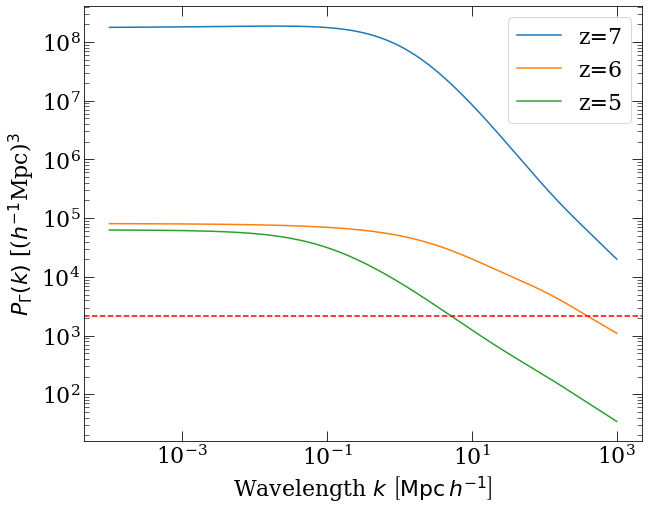

In [56]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})

plt.plot(fk,delgamma_ps(7.0,b_chi_gamma,b_chi_delta)*(0.7**3.0), label = 'z=7')
plt.plot(fk,delgamma_ps(6.0,b_chi_gamma,b_chi_delta)*(0.7**3.0), label = 'z=6')
plt.plot(fk,delgamma_ps(5.0,b_chi_gamma,b_chi_delta)*(0.7**3.0), label = 'z=5')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("$P_\Gamma(k)$ [($h^{-1}$Mpc)$^3$", fontsize = 22)
plt.xlabel(r"Wavelength $k$ $\left[{\rm Mpc}\, h^{-1}\right]$", fontsize = 22)
plt.axhline(y=2.184095e+03, color='r', linestyle='--')
plt.legend()
plt.savefig("deltagamma_PS_z7-6-5.pdf")

# Number density of sources Power Spectrum

$ \left\langle \frac{\delta\hat n^*}{n}({\bf k})\frac{\delta\hat n}{n}({\bf k}) \right\rangle = (\beta-1)^2\tau^2_\mathrm{eff} \left\langle \frac{\delta\hat\Gamma^*_\mathrm{HI}}{\Gamma} ({\bf k}) \frac{\delta\hat\Gamma_\mathrm{HI}}{\Gamma}({\bf k}) \right\rangle + (b_g-b_a\tau_\mathrm{eff})^2 \Bigg\langle \hat\delta^*({\bf k})\hat\delta({\bf k}) \Bigg\rangle \\ \nonumber
    +(\beta-1)\tau_\mathrm{eff}(b_g-b_a\tau_\mathrm{eff})\left[ \left\langle \frac{\delta\hat\Gamma^*_\mathrm{HI}}{\Gamma}({\bf k}) \hat\delta({\bf k}) \right\rangle + \left\langle \frac{\delta\hat\Gamma^*_\mathrm{HI}}{\Gamma}({\bf k}) \hat\delta^*({\bf k}) \right\rangle \right]$
    
    
$\left\langle \frac{\delta\hat n^*}{n}({\bf k})\frac{\delta\hat n}{n}({\bf k}) \right\rangle = (\beta-1)^2\tau^2_\mathrm{eff} \left\langle \frac{\delta\hat\Gamma^*_\mathrm{HI}}{\Gamma} ({\bf k}) \frac{\delta\hat\Gamma_\mathrm{HI}}{\Gamma}({\bf k}) \right\rangle + (b_g-b_a\tau_\mathrm{eff})^2 \Bigg\langle \hat\delta^*({\bf k})\hat\delta({\bf k}) \Bigg\rangle \\ \nonumber
    +2 (\beta-1)\tau_\mathrm{eff}(b_g-b_a\tau_\mathrm{eff}) \left\langle \frac{\delta\hat\Gamma^*_\mathrm{HI}}{\Gamma}({\bf k}) \hat\delta({\bf k}) \right\rangle  $

In [19]:
def deltaGamdelta(z,bj, b_chi_gamma, b_chi_delta):
    PDM = deltas_CDM.PDM.values
    fk = deltas_CDM.wl.values
    kappa = c*fk/H0
    mask = Gamma_coef.z.values == z
    z = Gamma_coef.z.values[mask]
    chi = Gamma_coef.chi.values[mask]
    fi_chi_zeta = Gamma_coef.fi_chi_zeta.values[mask]    
    a= 1.0/(1.0+z)
    atan_argument = kappa/(a*fi_chi_zeta)
    kappa_a = kappa/a
    
    factor1 = (kappa_a/np.arctan(atan_argument) + (b_chi_gamma*chi))**-1.
    
    term01 = fi_chi_zeta * bj
    term02 = - b_chi_delta * chi
    
    return factor1 * (term01 + term02)* PDM

In [20]:
def lya_psd(z, beta, bg, ba, tau_eff, bj=1.0 ):
    PDM = deltas_CDM.PDM.values
    PDgamma = delgamma_ps(z,b_chi_gamma,b_chi_delta)
    
    term1 = (beta - 1.0)**2 * tau_eff**2 * PDgamma

    term2 = (bg - ba * tau_eff)**2 * PDM

    term3 = 2.0* (beta - 1.0) * tau_eff * (bg - ba*tau_eff) *deltaGamdelta(z, bj, b_chi_gamma, b_chi_delta)
    
    return term1 + term2 + term3

[3.202573e+24]
[3.477861e+24]
[3.066806e+24]


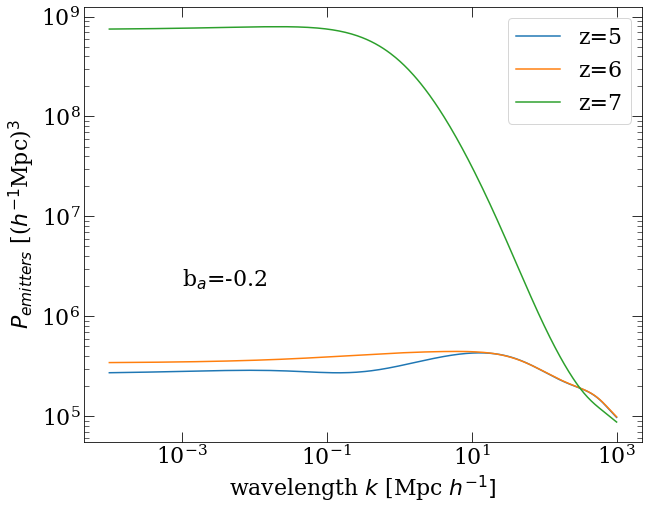

In [21]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})
plt.plot(fk,lya_psd(5.0, beta, bg, ba, tau_eff ), label = "z=5")
plt.plot(fk,lya_psd(6.0, beta, bg, ba, tau_eff ), label="z=6")
plt.plot(fk,lya_psd(7.0, beta, bg, ba, tau_eff ), label = "z=7")

plt.xscale('log')
plt.yscale('log')
plt.ylabel("$P_{emitters}$ [($h^{-1}$Mpc)$^3$", fontsize = 22)
plt.xlabel("wavelength $k$ [Mpc $h^{-1}]$", fontsize = 22)
plt.text(1e-3, 2e6, 'b$_a$=-0.2')
plt.legend()
plt.savefig("LyalphaemitterPS.pdf")

# Shot noise

In [61]:
def delgamma_sn(z,b_chi_gamma,b_chi_delta):
    fk = deltas_CDM.wl.values
    kappa = c*fk/H0
    
    mask = Gamma_coef.z.values == z
    z = Gamma_coef.z.values[mask]
    chi = Gamma_coef.chi.values[mask]
    fi_chi_zeta = Gamma_coef.fi_chi_zeta.values[mask]
    bq = 0.278*(1 + z)**2 + 0.57
    
    a= 1.0/(1.0+z)
    atan_argument = kappa/(a*fi_chi_zeta)
    kappa_a = kappa/a
    
    factor1 = (kappa_a/np.arctan(atan_argument) + (b_chi_gamma*chi))**-2.
    
    term01 = fi_chi_zeta**2 * emissivity_ps_djdj(z,bg,bq)
    #term02 = -2.0 * fi_chi_zeta * b_chi_delta * chi * emissivity_ps_ddj(z)
    #term03 = b_chi_delta**2 * chi**2 *  emissivity_ps_dd(z)
    
    return factor1 * (term01 )


def emissivity_ps_djdj(z,bg, bq):
    mask = Gamma_coef.z.values == z
    
    # neff ???
    #neff = (Gamma_coef.epsilon_gal + Gamma_coef.epsilon_qso)**2./(Gamma_coef.LG2.values + Gamma_coef.LQ2.values)
    neff = (Gamma_coef.epsilon_gal.values[mask]+ Gamma_coef.epsilon_qso.values[mask])**2./ \
         (Gamma_coef.LG2.values[mask] + Gamma_coef.LQ2.values[mask])
    print(Gamma_coef.epsilon_gal.values[mask])
    #Ds = Gamma_coef.Ds.values[mask]
    #ebg = Gamma_coef.epsilon_gal.values[mask]
    #ebq = Gamma_coef.epsilon_qso.values[mask]
    
    # Pinit = ??????
    #Pinit = deltas_CDM.PDM.values
    
    term_i = 1./neff
    
    #factor1 = (ebq + ebg)**(-2.)
    #term01 = ebg * ebg * Ds**2 * bg**2 * Pinit
    #term02 = 2.0 * ebg * ebq * Ds**2 * bg *bq * Pinit
    #term03 = ebq * ebq * Ds**2 * bq**2 * Pinit
    #print(term01, term02, term03)
    #print(neff)
    return term_i #+ factor1 * (term01 + term02 + term03)

#def emissivity_ps_dd(z):
    # This is the original from Matlab, the PSDM
    #PSdm = deltas_CDM.PDM.values
    #return PSdm

#def emissivity_ps_ddj(z,bj):
    # <delta*delta_j> = bj<delta*delta>
    #PSdm = bj*deltas_CDM.PDM.values
    #return PSdm

#delgamma_sn(5.0,b_chi_gamma,b_chi_delta)

[3.066806e+24]
[3.477861e+24]
[3.202573e+24]


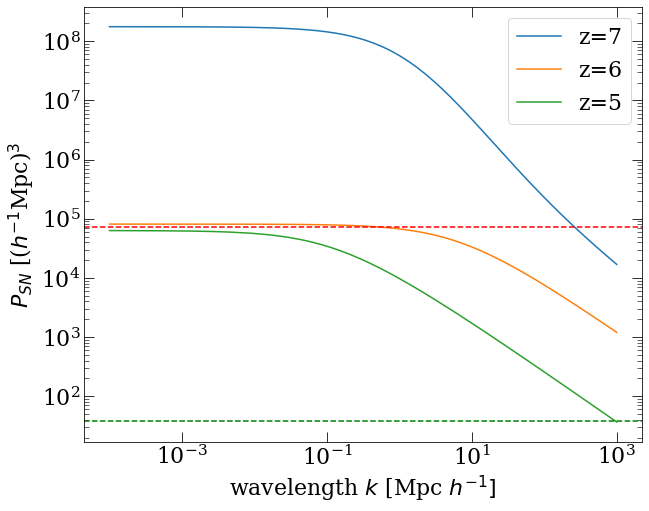

In [60]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})

plt.plot(fk,delgamma_sn(7.0,b_chi_gamma,b_chi_delta)*(0.7**3.0), label = 'z=7')
plt.plot(fk,delgamma_sn(6.0,b_chi_gamma,b_chi_delta)*(0.7**3.0), label = 'z=6')
plt.plot(fk,delgamma_sn(5.0,b_chi_gamma,b_chi_delta)*(0.7**3.0), label = 'z=5')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("$P_{SN}$ [($h^{-1}$Mpc)$^3$", fontsize = 22)
plt.xlabel("wavelength $k$ [Mpc $h^{-1}]$", fontsize = 22)
#plt.axhline(y=228307, color='r', linestyle='--')
plt.axhline(y=73264, color='r', linestyle='--')
plt.axhline(y=37.60, color='g', linestyle='--')
plt.legend()
plt.savefig("shot-noisePS.pdf")

In [24]:
(((1/323) + (-0.2*420))**-2.0)*((323)**2.0)/8e-6

1848368.2486781008

In [25]:
den = (323) + (-0.2*420)
coeff = (1/den)**2.0
coeff

1.7506696311339085e-05

In [26]:
coeff* (323**2.0)/8e-6

228307.01493321193

# Without the shot-noise contribution


In [89]:

b_chi_delta = 1.0 #0.574
b_chi_gamma = -0.20
bg= 3.0 #2.5 


In [97]:
D2_z5 = 0.2139*0.2139 #Growth factor z=5
D2_z6 = 0.1835*0.1835 #Growth factor z=6
D2_z7 = 0.1606*0.1606 #Growth factor z=7

def delgamma_wsnps(z,b_chi_gamma,b_chi_delta):
    fk = deltas_CDM.wl.values
    kappa = c*fk/H0
    mask = Gamma_coef.z.values == z
    z = Gamma_coef.z.values[mask]
    chi = Gamma_coef.chi.values[mask]
    fi_chi_zeta = Gamma_coef.fi_chi_zeta.values[mask]
    print("fi_chi_zeta=", fi_chi_zeta)
    print("chi=", chi)
    bq = 0.278*(1 + z)**2 + 0.57
    print("bq=", bq)
    a= 1.0/(1.0+z)
    atan_argument = kappa/(a*fi_chi_zeta)
    kappa_a = kappa/a
    bj = (bg*Gamma_coef.epsilon_gal.values[mask] + bq*Gamma_coef.epsilon_qso.values[mask])/(Gamma_coef.epsilon_gal.values[mask] + Gamma_coef.epsilon_qso.values[mask])
    print("bj=", bj)
    factor1 = (kappa_a/np.arctan(atan_argument) + (b_chi_gamma*chi))**-2.
    
    term01 = fi_chi_zeta**2 * emissivity_wsnps_djdj( bj)
    term02 = -2.0 * fi_chi_zeta * b_chi_delta * chi * emissivity_wsnps_ddj(bj)
    term03 = b_chi_delta**2 * chi**2 *  emissivity_wsnps_dd()
    test = bj*fi_chi_zeta-chi
    print("TEST", 13.7*(test/239)**2.0)
    return factor1 * (term01 + term02 + term03)


def emissivity_wsnps_djdj(bj):
    return bj*bj*deltas_CDM.PDM.values*D2_z6

def emissivity_wsnps_ddj (bj):
    return bj*deltas_CDM.PDM.values*D2_z6

def emissivity_wsnps_dd():
    return deltas_CDM.PDM.values*D2_z6

delgamma_wsnps(6.0, b_chi_gamma,b_chi_delta)


fi_chi_zeta= [323.2763]
chi= [420.209]
bq= [14.192]
bj= [3.27549936]
TEST [97.83506626]


array([  97.74229355,   98.67630308,   99.61918709,  100.81525989,
        101.78083562,  102.75564551,  103.73978546,  104.73335137,
        105.73641513,  106.74909663,  107.77144377,  108.80355245,
        109.84537509,  110.89733894,  111.95937593,  113.03155794,
        114.11400486,  115.20678857,  116.31005294,  117.42362664,
        118.54808803,  119.68329365,  120.82933938,  121.98634507,
        123.15418924,  124.33342224,  125.52395073,  126.72561437,
        127.93901701,  129.16400266,  130.40071517,  131.64895004,
        132.90937513,  134.18188655,  135.4662634 ,  136.76320611,
        138.0722418 ,  139.39407086,  140.7285613 ,  142.07546252,
        143.43555792,  144.80831474,  146.19451808,  147.5936331 ,
        149.00647132,  150.43242308,  151.87232713,  153.32561814,
        154.792802  ,  156.27439158,  157.76970425,  159.27970069,
        160.80371654,  162.34227086,  163.89596398,  165.46401087,
        167.04702669,  168.64515487,  170.25895897,  171.88770

In [92]:
deltas_CDM.PDM.values*D2_z6

array([ 13.71494313,  13.84602247,  13.97834767,  14.14620047,
        14.28171108,  14.41851806,  14.5566349 ,  14.69607505,
        14.83684863,  14.97897246,  15.12245328,  15.26730457,
        15.41354652,  15.56118586,  15.71023945,  15.86071736,
        16.01263645,  16.16600682,  16.32084866,  16.47716871,
        16.63498718,  16.79431417,  16.95516314,  17.11755093,
        17.28149438,  17.44700359,  17.61409877,  17.78279337,
        17.95310088,  18.12503475,  18.2986152 ,  18.47385232,
        18.65076296,  18.82937067,  19.00968557,  19.19172449,
        19.37550426,  19.56103836,  19.74835035,  19.93745034,
        20.12835853,  20.32109176,  20.51566685,  20.71210403,
        20.91042011,  21.11062857,  21.31274625,  21.51679672,
        21.72280018,  21.93077346,  22.14073004,  22.35269349,
        22.56668401,  22.78271843,  23.00082033,  23.2209998 ,
        23.44328379,  23.6676925 ,  23.8942394 ,  24.12295143,
        24.35384878,  24.5869483 ,  24.82227355,  25.05

In [98]:
#delgamma_wsnps(6.0, b_chi_gamma,b_chi_delta)*(0.7**3.0)

fi_chi_zeta= [323.2763]
chi= [420.209]
bq= [14.192]
bj= [3.27549936]
TEST [97.83506626]


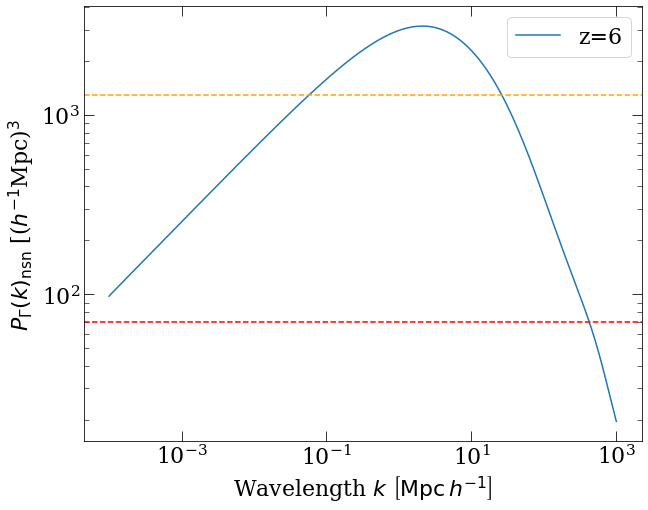

In [99]:


plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})

#plt.plot(fk,delgamma_wsnps(7.0,b_chi_gamma,b_chi_delta)*(0.7**3.0), label = 'z=7')
plt.plot(fk,delgamma_wsnps(6.0,b_chi_gamma,b_chi_delta), label = 'z=6')
#plt.plot(fk,delgamma_wsnps(5.0,b_chi_gamma,b_chi_delta)*(0.7**3.0), label = 'z=5')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("$P_\Gamma(k)_\mathrm{nsn}$ [($h^{-1}$Mpc)$^3$", fontsize = 22)
plt.xlabel(r"Wavelength $k$ $\left[{\rm Mpc}\, h^{-1}\right]$", fontsize = 22)
plt.axhline(y=69.79, color='r', linestyle='--')
plt.axhline(y=1291, color='orange', linestyle='--')
plt.legend()
plt.savefig("deltagamma_WSNPS_z7-6-5.pdf")

### SAVE FILE
Make output file that mimicks LyASolvedGammakCorr.mat. Should contain:
<li>fk --> Wavenumber</li>
<li>dGammakCorr_nsn --> P_Gamma(k) without the shot noise contribution</li>
<li> dGammakCorr --> the total P_Gamma(k) including the shot noise contribution</li>


In [32]:
np.savetxt("LyASolvedGammakCorr.txt",np.array([fk,delgamma_wsnps(6.0, b_chi_gamma,b_chi_delta)*(0.7**3.0),delgamma_ps(6.0, b_chi_gamma,b_chi_delta)*(0.7**3.0)]).T)

fi_chi_zeta= [323.2763]
chi= [420.209]
bq= [14.192]
bj= [3.27549936]
[3.477861e+24]


In [33]:
z=5
bq = 0.278*(1 + z)**2 + 0.57

In [34]:
pwd

'/Users/teresita/Documents/cosmic reionization paper/DeltaGamma'

In [35]:
delgamma_sn(6.0, b_chi_gamma,b_chi_delta)*(0.7**3.0)

[3.477861e+24]


array([81235.75935386, 81235.63286324, 81235.50511443, 81235.37610743,
       81235.24584226, 81235.11431894, 81234.98153747, 81234.84749786,
       81234.71220014, 81234.57564432, 81234.4378304 , 81234.2987584 ,
       81234.01684023, 81233.87399408, 81233.7298899 , 81233.58452772,
       81233.43790754, 81233.29002937, 81233.14089324, 81232.83884714,
       81232.6859372 , 81232.53176934, 81232.3763436 , 81232.21965997,
       81231.90251915, 81231.74206199, 81231.580347  , 81231.25314365,
       81231.08765531, 81230.92090921, 81230.75290539, 81230.41312458,
       81230.24134764, 81230.06831303, 81229.71847086, 81229.54166334,
       81229.1842755 , 81229.00369522, 81228.82185739, 81228.45440915,
       81228.26879877, 81227.8938056 , 81227.70442285, 81227.32188508,
       81227.1287301 , 81226.73864806, 81226.54172104, 81226.14409508,
       81225.74144003, 81225.53822664, 81225.12802825, 81224.92104329,
       81224.50330191, 81224.08053208, 81223.86726155, 81223.43694935,
      

In [36]:
delgamma_ps(6.0, b_chi_gamma,b_chi_delta)*(0.7**3.0)

[3.477861e+24]


array([80674.86754724, 80669.38126535, 80663.84279924, 80656.85015717,
       80651.17895885, 80645.45351235, 80639.67326739, 80633.83767367,
       80627.94631863, 80621.99851429, 80615.99398581, 80609.93218293,
       80603.67179055, 80597.49227509, 80591.25369713, 80584.95564417,
       80578.5974283 , 80572.17863704, 80565.69844479, 80559.00618274,
       80552.40057809, 80545.73206001, 80539.00007836, 80532.20394531,
       80525.18515874, 80518.25770132, 80511.26416715, 80504.04124581,
       80496.91267555, 80489.71637869, 80482.45152979, 80474.94878312,
       80467.54408705, 80460.06877617, 80452.34856829, 80444.72928614,
       80436.86002839, 80429.09416377, 80421.25438455, 80413.15777598,
       80405.16729077, 80396.91476552, 80388.77068813, 80380.35936242,
       80372.05866918, 80363.48579718, 80355.02601534, 80346.28871376,
       80337.46665935, 80328.76137969, 80319.77036544, 80310.89830213,
       80301.73503236, 80292.48330544, 80283.3542042 , 80273.92569257,
      

In [37]:
delgamma_ps(6.0, b_chi_gamma,b_chi_delta)

[3.477861e+24]


array([235203.69547299, 235187.70048207, 235171.55335055, 235151.16663899,
       235134.63253309, 235117.94026925, 235101.08824312, 235084.07485036,
       235066.89888814, 235049.55835071, 235032.05243676, 235014.37954206,
       234996.12766925, 234978.11158918, 234959.92331525, 234941.56164481,
       234923.02457231, 234904.31089516, 234885.41820639, 234865.90723832,
       234846.64891572, 234827.20717204, 234807.58040338, 234787.76660439,
       234767.30366978, 234747.10700095, 234726.71768848, 234705.65960877,
       234684.87660511, 234663.89614779, 234642.71583028, 234620.8419333 ,
       234599.25389811, 234577.45998883, 234554.95209415, 234532.73844357,
       234509.79600113, 234487.15499641, 234464.29849722, 234440.69322444,
       234417.39734918, 234393.33750879, 234369.59384295, 234345.07102747,
       234320.87075562, 234295.8769597 , 234271.2128727 , 234245.73969027,
       234220.01941502, 234194.63959092, 234168.4267214 , 234142.56064761,
       234115.84557539, 2